<a href="https://colab.research.google.com/github/MahimaManuela/Xebia/blob/main/Copy_of_Xebia_MachineLearning_basemodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing data from the csv

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_excel("/content/drive/MyDrive/Xebia/amazonLabelled.xlsx")

In [ ]:
df.head()

,S,Feedback,Sentiment
0,1.0,"Good case, Excellent value.",Positive
1,2.0,Great for the jawbone.,Positive
2,3.0,Tied to charger for conversations lasting more...,Negative
3,4.0,The mic is great.,Positive
4,5.0,I have to jiggle the plug to get it to line up...,Negative


In [ ]:
df.shape

(999, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   S          999 non-null    float64
 1   Feedback   999 non-null    object 
 2   Sentiment  999 non-null    object 
dtypes: float64(1), object(2)
memory usage: 23.5+ KB


In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
% matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#Univariate analysis

In [ ]:
df.drop('S',inplace=True,axis=1)

Removing the S column as it corresponds to index

In [ ]:
df['Sentiment'].unique()

array(['Positive', 'Negative'], dtype=object)

In [ ]:
df.head()

,Feedback,Sentiment
0,"Good case, Excellent value.",Positive
1,Great for the jawbone.,Positive
2,Tied to charger for conversations lasting more...,Negative
3,The mic is great.,Positive
4,I have to jiggle the plug to get it to line up...,Negative


In [ ]:
df['Sentiment'].value_counts()

Positive    500
Negative    499
Name: Sentiment, dtype: int64

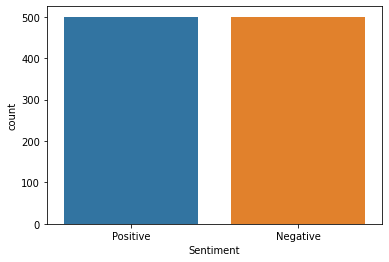

In [ ]:
sns.countplot(df['Sentiment'])

So the target classes is almost balanced

##Data preprocessing for the textual data part

In [ ]:
# remove special characters, numbers, punctuations
df['Cleaned_txt'] = df['Feedback'].str.replace('[^a-zA-Z]',' ')

##Converting text to lowercase

In [ ]:
df['Cleaned_txt'] = df['Cleaned_txt'].str.lower()

##Visualizaing the most common words in the corresponding target

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
negative_review=df['Cleaned_txt'][df['Sentiment']=='Negative']
positive_review=df['Cleaned_txt'][df['Sentiment']=='Positive']
negative_review.shape,positive_review.shape

((499,), (500,))

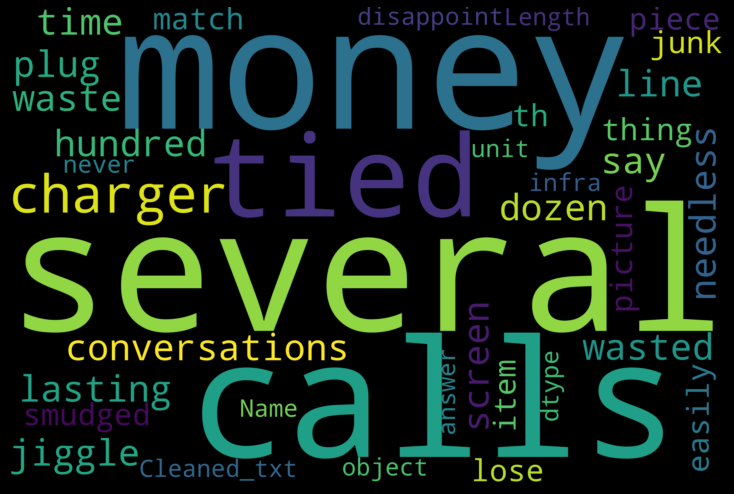

In [ ]:
text = negative_review
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (10, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

The above graph/plot is known as wordcloud ,the size of words signifies the frequency of the word present in the sentences.
so after seeing the wordcloud we can infer that most of the negative reviews are related to chargers,plugs.

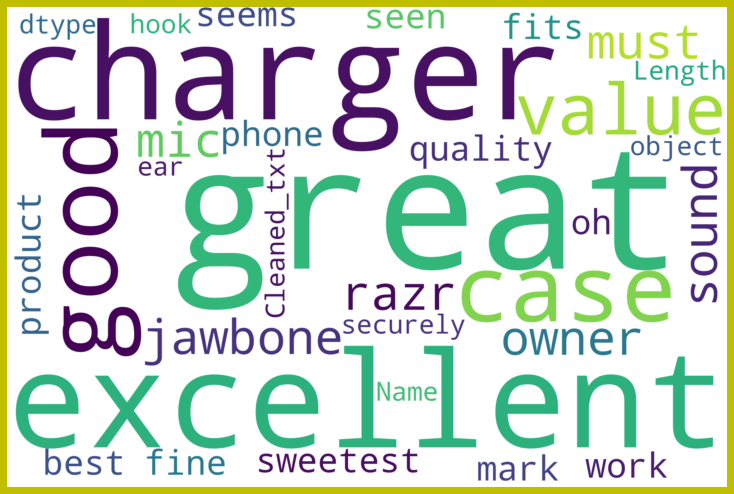

In [ ]:
text = positive_review
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'White',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (10, 20),
    facecolor = 'y',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Bilinear Interpolation : is a resampling method that uses the distanceweighted average of the four nearest pixel values to estimate a new pixel value. The four cell centers from the input raster are closest to the cell center for the output processing cell will be weighted and based on distance and then averaged.

##Visualizing the length of text

In [ ]:
df['review_len'] = df['Cleaned_txt'].astype(str).apply(len)
positive=df['Cleaned_txt'][df['Sentiment']=='Positive'].astype(str).apply(len)
negative=df['Cleaned_txt'][df['Sentiment']=='Negative'].astype(str).apply(len)#Explain

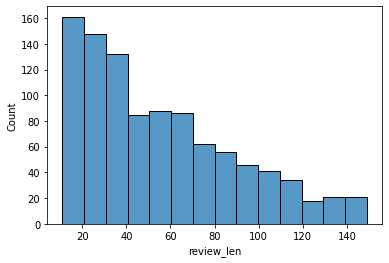

In [ ]:
sns.histplot(df['review_len'])

The above histogram shows us the length of text and we can infer that most of the text are from 25 to 50 length. with no outliers

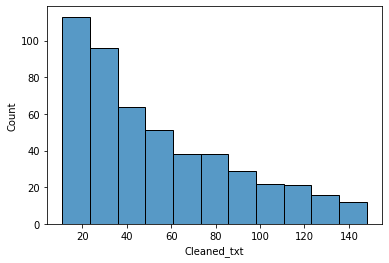

In [ ]:
sns.histplot(positive)

so positive reviews tend to be short

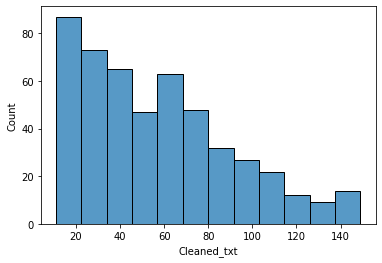

In [ ]:
sns.histplot(negative)

where as negative reviews tend to lengthy in comparison to positive reviews.

In [ ]:
#Dividing the data into depenent and indepent features
X=df["Cleaned_txt"]

##Using Label Encoder to convert categorical to numerical

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
df['label'] = le.fit_transform(df['Sentiment'])
y=df['label']

In [ ]:
df.head()

,Feedback,Sentiment,Cleaned_txt,review_len,label
0,"Good case, Excellent value.",Positive,good case excellent value,27,1
1,Great for the jawbone.,Positive,great for the jawbone,22,1
2,Tied to charger for conversations lasting more...,Negative,tied to charger for conversations lasting more...,79,0
3,The mic is great.,Positive,the mic is great,17,1
4,I have to jiggle the plug to get it to line up...,Negative,i have to jiggle the plug to get it to line up...,74,0


In [ ]:
X.shape,y.shape

((999,), (999,))

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

##Removing stopwords of english alphabet

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
from nltk.corpus import stopwords

##Building Corpus from the word the cleaned data.

In [ ]:
df['Cleaned_txt'][2]

'tied to charger for conversations lasting more than    minutes major problems  '

In [ ]:
X[2]

'tied to charger for conversations lasting more than    minutes major problems  '

In [ ]:

corpus = []
for i in range(0, len(df)):
    review = df['Cleaned_txt'][i]
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus[:4]

['good case excellent value',
 'great jawbone',
 'tied charger conversation lasting minute major problem',
 'mic great']

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
corpus1 = [word_tokenize(i) for i in corpus]

In [ ]:
corpus1[:4]

[['good', 'case', 'excellent', 'value'],
 ['great', 'jawbone'],
 ['tied', 'charger', 'conversation', 'lasting', 'minute', 'major', 'problem'],
 ['mic', 'great']]

# Word2Vec

In [ ]:
import gensim

In [ ]:
model = gensim.models.Word2Vec(
    window = 10, #number of words before and after the target word
    min_count = 2, #number of words in the sentance
    workers = 4 # how many threads will our cpu use
)

In [ ]:
#build vocabulary

model.build_vocab(corpus1)

In [ ]:
model.corpus_count

999

In [ ]:
model.train(corpus1, total_examples = model.corpus_count, epochs = 1000)

(3333691, 5179000)

In [ ]:
model.wv.most_similar("good")

[('great', 0.3094576597213745),
 ('mess', 0.29877611994743347),
 ('tremendous', 0.2743832468986511),
 ('bt', 0.27010005712509155),
 ('nice', 0.26400327682495117),
 ('like', 0.26119089126586914),
 ('excellent', 0.23311129212379456),
 ('looking', 0.22531287372112274),
 ('happy', 0.22434943914413452),
 ('comfortable', 0.2209121584892273)]

In [ ]:
model.wv.similarity(w1 = "great", w2 = "good") #words with similar meanings

0.30945763

In [ ]:
model.wv.similarity(w1 = "bad", w2 = "good") #words with opposite meanings

0.007064816

In [ ]:
model.wv.similarity(w1 = "great", w2 = "conversation") #random words

-0.14297697